### linear regression 사용해서 예측하기 

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
from tqdm import tqdm

In [2]:
data = pd.read_csv("data/google_embedding_data.csv")

In [3]:
data

,Unnamed: 0,Category,Message,clean_message,encode_category,G_Embeddings
0,0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...,0,"[0.028807206, -0.03621563, -0.050047267, -0.04..."
1,1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,0,"[0.028476495, 0.0013876868, -0.06420778, -0.01..."
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,1,"[0.05030803, -0.07512517, -0.042560495, -0.074..."
3,3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,0,"[-0.007327647, -0.022901433, -0.024781676, -0...."
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,0,"[0.023844084, -0.016894948, -0.01716121, -0.06..."
...,...,...,...,...,...,...
5555,5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact £750 pound prize claim ...,1,"[0.0053461296, -0.05480214, -0.055548646, -0.0..."
5556,5568,ham,Will ü b going to esplanade fr home?,going esplanade fr home,0,"[0.033655215, -0.0031889905, -0.039510705, -0...."
5557,5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,0,"[-0.002391516, -0.021267267, -0.046133913, -0...."
5558,5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,0,"[0.012761247, -0.027776903, -0.03975404, -0.06..."


In [4]:
# G_embedding 값을 하나씩 읽어서 string -> numpy ndarray로 변환
np_embedding_data = [np.array(eval(txt)) for txt in tqdm(data['G_Embeddings'])]

print(len(np_embedding_data))

100%|██████████| 5560/5560 [00:03<00:00, 1551.90it/s]

5560


In [5]:
print(type(np_embedding_data[0]))

<class 'numpy.ndarray'>


In [6]:
X_train, X_test, y_train, y_test = train_test_split(np_embedding_data,data["encode_category"],test_size=0.2,shuffle=True)

In [7]:
print("train 개수 : ", len(X_train))

train 개수 :  4448


In [8]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression

# 이진분류라서 Logistic Regression 채택 
lr=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr.fit(X_train, y_train)


y_predict = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       941
           1       1.00      0.93      0.96       171

    accuracy                           0.99      1112
   macro avg       0.99      0.96      0.98      1112
weighted avg       0.99      0.99      0.99      1112

0.9892086330935251
0.9636363636363636


### Keras의 layer 를 사용해 직접 분류 모델 생성해서 예측하기


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics as skmetrics

In [10]:
# list -> pandas Dataframe으로 변환
df_embedding_data = pd.DataFrame(np_embedding_data)

print(type(df_embedding_data))
print(type(df_embedding_data[0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
df_X_train = pd.DataFrame(X_train)

print(type(df_X_train))
print(df_X_train.shape)
print(len(df_X_train))

<class 'pandas.core.frame.DataFrame'>
(4448, 768)
4448


In [12]:
df_X_test = pd.DataFrame(X_test)


print(type(df_X_test))
print(df_X_test.shape)
print(len(df_X_test))

<class 'pandas.core.frame.DataFrame'>
(1112, 768)
1112


In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(len(df_X_train)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
history = model.fit(x=df_X_train,y=y_train,epochs=5,verbose=1,validation_split=0.2)

Epoch 1/5
112/112 [==============================] - 1s 7ms/step - loss: 0.1441 - accuracy: 0.8707 - val_loss: 0.0984 - val_accuracy: 0.8697
Epoch 2/5
112/112 [==============================] - 1s 6ms/step - loss: 0.0509 - accuracy: 0.9767 - val_loss: 0.0614 - val_accuracy: 0.9854
Epoch 3/5
112/112 [==============================] - 1s 6ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0316 - val_accuracy: 0.9933
Epoch 4/5
112/112 [==============================] - 1s 6ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0349 - val_accuracy: 0.9899
Epoch 5/5
112/112 [==============================] - 1s 6ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0238 - val_accuracy: 0.9944


In [34]:
model.evaluate(x=df_X_test, y=y_test, return_dict=True)

35/35 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9892


{'loss': 0.04491393268108368, 'accuracy': 0.9892086386680603}

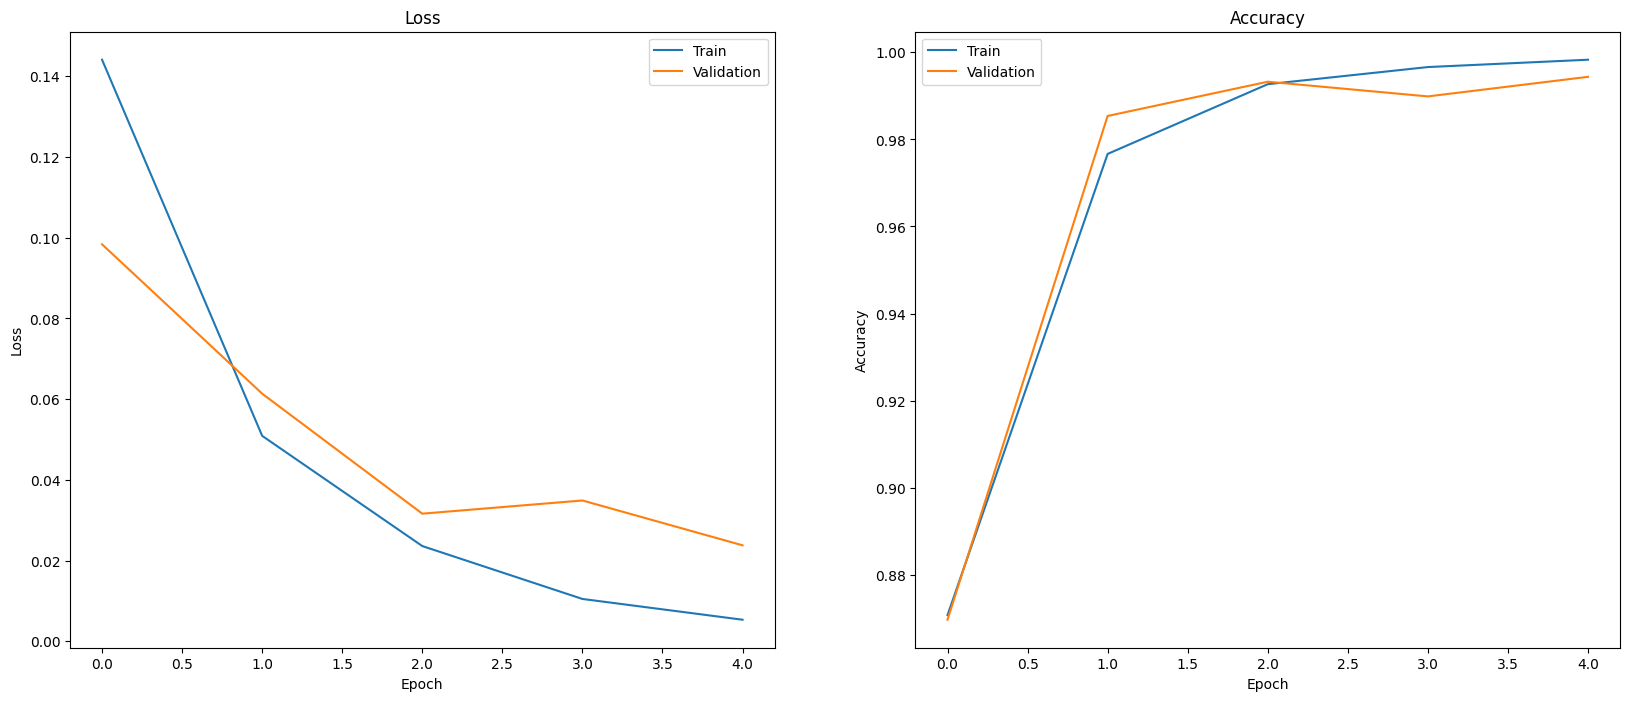

In [35]:
def plot_history(history):
    """
      Plotting training and validation learning curves.
  
      Args:
        history: model history with all the metric measures
    """
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(20, 8)

    # Plot loss
    ax1.set_title('Loss')
    ax1.plot(history.history['loss'], label = 'train')
    ax1.plot(history.history['val_loss'], label = 'validation')
    ax1.set_ylabel('Loss')

    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])

    # Plot accuracy
    ax2.set_title('Accuracy')
    ax2.plot(history.history['accuracy'],  label = 'train')
    ax2.plot(history.history['val_accuracy'], label = 'validation') 
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])

    plt.show()

plot_history(history)

In [27]:
y_hat = model.predict(x=df_X_test)

35/35 [==============================] - 0s 2ms/step


In [37]:
count = 0 
for answer , prediction in zip(y_test, y_hat):
    if prediction > 0 : 
        prediction = 1
    else: 
        prediction = 0 
    
    if answer == prediction: 
        count += 1
    
print("Accuracy on test : " + str(count/len(y_test)))
        

Accuracy on test : 0.9865107913669064
